# Модуль 2. Лабораторная работа

<b>Цель работы: </b> построение и применение моделей машинного обучения к несбалансированным данным.

In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pathlib
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install imblearn
!{sys.executable} -m pip install seaborn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Загрузите датасет и выведите его как таблицу
df = pd.read_csv("lending_data.csv")

# Построение модели линейной регрессии для предсказания дохода заемщика

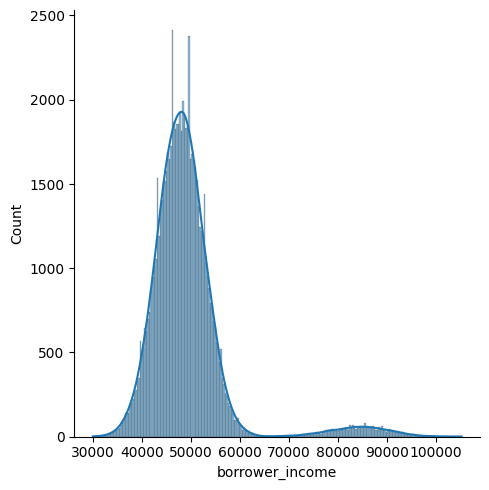

In [ ]:
# Постройте гистограмму дохода заемщика (borrower_income)

# ваш код здесь
g = sns.displot(df, x = "borrower_income", kde=True)
plt.show()

In [ ]:
# Применим лог трансформ к таргетной переменной
df['borrower_income'] = np.log(df['borrower_income'])

y = df['borrower_income'].values
y

array([10.87426647, 10.68281243, 10.73856823, ..., 11.2935249 ,
       11.22923541, 11.18857941])

### Нормализация данных

In [ ]:
# 1. Удалите ненужные колонки ('borrower_income', 'debt_to_income', 'loan_status')

# ваш код здесь
df = df.drop(['borrower_income', 'debt_to_income', 'loan_status'], errors='ignore')

In [ ]:
# 2. Используйте StandardScaler из библиотеки sklearn для нормализации численных данных
from sklearn.preprocessing import StandardScaler

# ваш код здесь
scaler = StandardScaler()
nrml = scaler.fit_transform(df)
display(nrml)

array([[ 0.42730427,  0.4268375 ,  0.56189484, ...,  1.04399575,
         0.42740435, -0.18253038],
       [-0.67148676, -0.67491817, -0.75298327, ..., -0.67397306,
        -0.67155173, -0.18253038],
       [-0.38484562, -0.370249  , -0.37006066, ..., -0.67397306,
        -0.37292236, -0.18253038],
       ...,
       [ 3.72367737,  3.71299241,  3.4412999 , ...,  2.76196455,
         3.71232744,  5.47853995],
       [ 3.10262157,  3.12051768,  2.99976919, ...,  2.76196455,
         3.1150687 ,  5.47853995],
       [ 2.76820691,  2.75401528,  2.72054974, ...,  2.76196455,
         2.75671345,  5.47853995]])

In [ ]:
# Не забудьте обозначить нормализованные признаки за Х

# ваш код здесь
X = nrml

### Деление данных на тренировочные и тестовые выборки

In [ ]:
# Используйте train_test_split для деления данных на выборки
from sklearn.model_selection import train_test_split

# ваш код здесь
X_train, X_test = train_test_split(X)
y_train, y_test = train_test_split(y)

### Построение модели

In [ ]:
# Инициализируйте модель линейной регрессии и примерьте тренировочные данные
from sklearn.linear_model import LinearRegression

# ваш код здесь
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# сделайте предсказания, воспользовавшись методом predict

# ваш код здесь
y_train_pred = model.predict(X_train)

### Оценка модели (замените переменные, если нужно)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

print("R-squared score:", r2_score(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))

R-squared score: 0.0001153192016912774
MSE: 0.021330686372713823


In [ ]:
y_train = np.exp(y_train)
y_train_pred = np.exp(y_train_pred)

df1 = pd.DataFrame(data = y_train, columns = ['y_true'])
df2 = pd.DataFrame(data = y_train_pred, columns = ['prediction'])

train_pred = pd.concat([df1, df2],  axis=1)

display(train_pred)

,y_true,prediction
0,54800.00,48586.92
1,37600.00,48641.54
2,58200.00,48616.76
3,52500.00,48732.52
4,52700.00,48638.36
...,...,...
58147,44000.00,48612.62
58148,45500.00,48670.50
58149,50700.00,48705.30
58150,49200.00,48677.38


### Предсказания на тестовой выборке

In [ ]:
# сделайте предсказания, воспользовавшись методом predict

# ваш код здесь
y_test_pred = model.predict(X_test)

In [ ]:
print("R-squared score:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))

R-squared score: 5.03333177614973e-05
MSE: 0.020802422821156377


In [ ]:
y_test = np.exp(y_test)
y_test_pred = np.exp(y_test_pred)

In [ ]:
df1 = pd.DataFrame(data = y_test, columns = ['y_true'])
df2 = pd.DataFrame(data = y_test_pred, columns = ['prediction'])

test_pred = pd.concat([df1, df2],  axis=1)

display(test_pred)

,y_true,prediction
0,44000.00,48614.32
1,47800.00,48666.60
2,50600.00,48614.35
3,41100.00,48667.41
4,51100.00,48710.66
...,...,...
19379,50400.00,48621.07
19380,50100.00,48993.77
19381,49300.00,48473.87
19382,48600.00,48664.82


In [ ]:
test_pred.describe()

,y_true,prediction
count,19384.00,19384.00
mean,49159.54,48669.89
std,8268.29,77.48
min,30100.00,47854.63
25%,44800.00,48622.75
50%,48100.00,48669.74
75%,51400.00,48716.78
max,102300.00,49433.96


# Построение модели логистической регрессии для предсказания "loan_status" (возможности заемщика выплатить кредит)

In [ ]:
display(df)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.00,7.67,10.87,0.43,5,1,22800,0
1,8400.00,6.69,10.68,0.31,3,0,13600,0
2,9000.00,6.96,10.74,0.35,3,0,16100,0
3,10700.00,7.66,10.87,0.43,5,1,22700,0
4,10800.00,7.70,10.88,0.43,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.00,11.26,11.37,0.65,12,2,56600,1
77532,17700.00,10.66,11.30,0.63,11,2,50900,1
77533,17600.00,10.60,11.29,0.63,11,2,50300,1
77534,16300.00,10.07,11.23,0.60,10,2,45300,1


In [ ]:
# Делим данные на признаки и таргет

# отделяем переменную 'loan_status' как таргет
y = df['loan_status']


# остальные переменные оставляем как признаки
X = df.drop(columns=['loan_status'])

In [ ]:
# проверяем сбалансированность классов
y.value_counts()

,count
loan_status,
0,75036
1,2500


### Деление данных на тренировочную и тестовую выборки

In [ ]:
# Поделите данные, используя train_test_split
# Назначьте random_state = 1 для воспроизводимости

# ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### Построение модели

In [ ]:
from sklearn.linear_model import LogisticRegression

# Инициируйте модель логистической регрессии
# Назначьте random_state = 1 для воспроизводимости

# ваш код здесь
model = LogisticRegression(random_state = 1)
# Примерьте тренировочные данные к модели

# ваш код здесь
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Предсказания для тестовых данных

In [ ]:
# Сделайте предсказания для тестовых данных

# ваш код здесь
pred = model.predict(X_test)

### Оценка работы модели (на несбалансированных данных)

In [ ]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, pred)

0.9696586511081926

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix for the model
print(confusion_matrix(y_test, pred))

# TN FP
# FN TP

[[18657   108]
 [   34   585]]


In [ ]:
# Print the classification report for the model
print(classification_report_imbalanced(y_test, pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.95      1.00      0.97      0.94     18765
          1       0.84      0.95      0.99      0.89      0.97      0.94       619

avg / total       0.99      0.99      0.95      0.99      0.97      0.94     19384



### Балансировка классов

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Инициируем балансировщик с random_state=1
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler mode
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
# Проверяем сбалансированность классов
y_resampled.value_counts()

,count
loan_status,
0,56271
1,56271


### Построение модели логистической регрессии на сбалансированных данных

In [ ]:
# Инициируйте модель логистической регрессии
# Назначьте random_state = 1 для воспроизводимости

# ваш код здесь
balanced_model = LogisticRegression(random_state=1)
# Примерьте тренировочные данные к модели

# ваш код здесь
balanced_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [ ]:
# Сделайте предсказания на тестовых данных

# ваш код здесь
y_pred = model.predict(X_resampled)

### Print results

In [ ]:
# Проверяем точность модели
balanced_accuracy_score(y_resampled, y_pred)

0.9617209575091966

In [ ]:
# Генерируем матрицу ошибок
print(confusion_matrix(y_resampled, y_pred))

[[55985   286]
 [ 4022 52249]]


In [ ]:
# Print the classification report for the model
print(classification_report_imbalanced(y_resampled, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.99      0.93      0.96      0.96      0.93     56271
          1       0.99      0.93      0.99      0.96      0.96      0.92     56271

avg / total       0.96      0.96      0.96      0.96      0.96      0.92    112542



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Ответьте на вопрос: </h1>
<b>Как сбалансированность классов повлияла на работу модели?</b> <br>
<b>Опирайтесь на метрики точности и матрицу ошибок при своем ответе.</b>
</div>

Ответ: Сбалансированность классов способствовала улучшению результатов для первого класса, который в исходной модели был распознан менее эффективно из-за значительного дисбаланса в данных. После балансировки как точность, так и полнота для обоих классов возросли, что привело к улучшению общей производительности модели. В результате модель приобрела большую универсальность и стала более эффективно работать с обоими классами.

 # Построение модели опорных векторов для предсказания 'loan_status'

### Построение модели

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=3)
model.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
# Примените GridSearchCV для подбора оптимальных гиперпараметров (по желанию)

### Предсказания на тестовой выборке

In [ ]:
# Сделайте предсказания на тестовых данных

# ваш код здесь
y_pred = model.predict(X_test)

### Оценка модели

In [ ]:
# выведите balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.9905270398651461

In [ ]:
# Сгенерируйте confusion_matrix для модели
print(confusion_matrix(y_test, y_pred))

[[18652   113]
 [    8   611]]


In [ ]:
# Выведите classification_report для модели
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.99      1.00      0.99      0.98     18765
          1       0.84      0.99      0.99      0.91      0.99      0.98       619

avg / total       0.99      0.99      0.99      0.99      0.99      0.98     19384



# Построение дерева решений для предсказания 'loan_status'

### Построение модели

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# постройте базовую модель с дефолтными параметрами и примерьте тренировочные данные

# ваш код здесь
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Предсказания на тестовой выборке

In [ ]:
# Сделайте предсказания на тестовых данных

# ваш код здесь
y_pred = model.predict(X_test)

In [ ]:
# оцените точность модели (balanced_accuracy_score)

# ваш код здесь
balanced_accuracy_score(y_test, y_pred)

0.9246908558236879

### Визуализируйте дерево решений

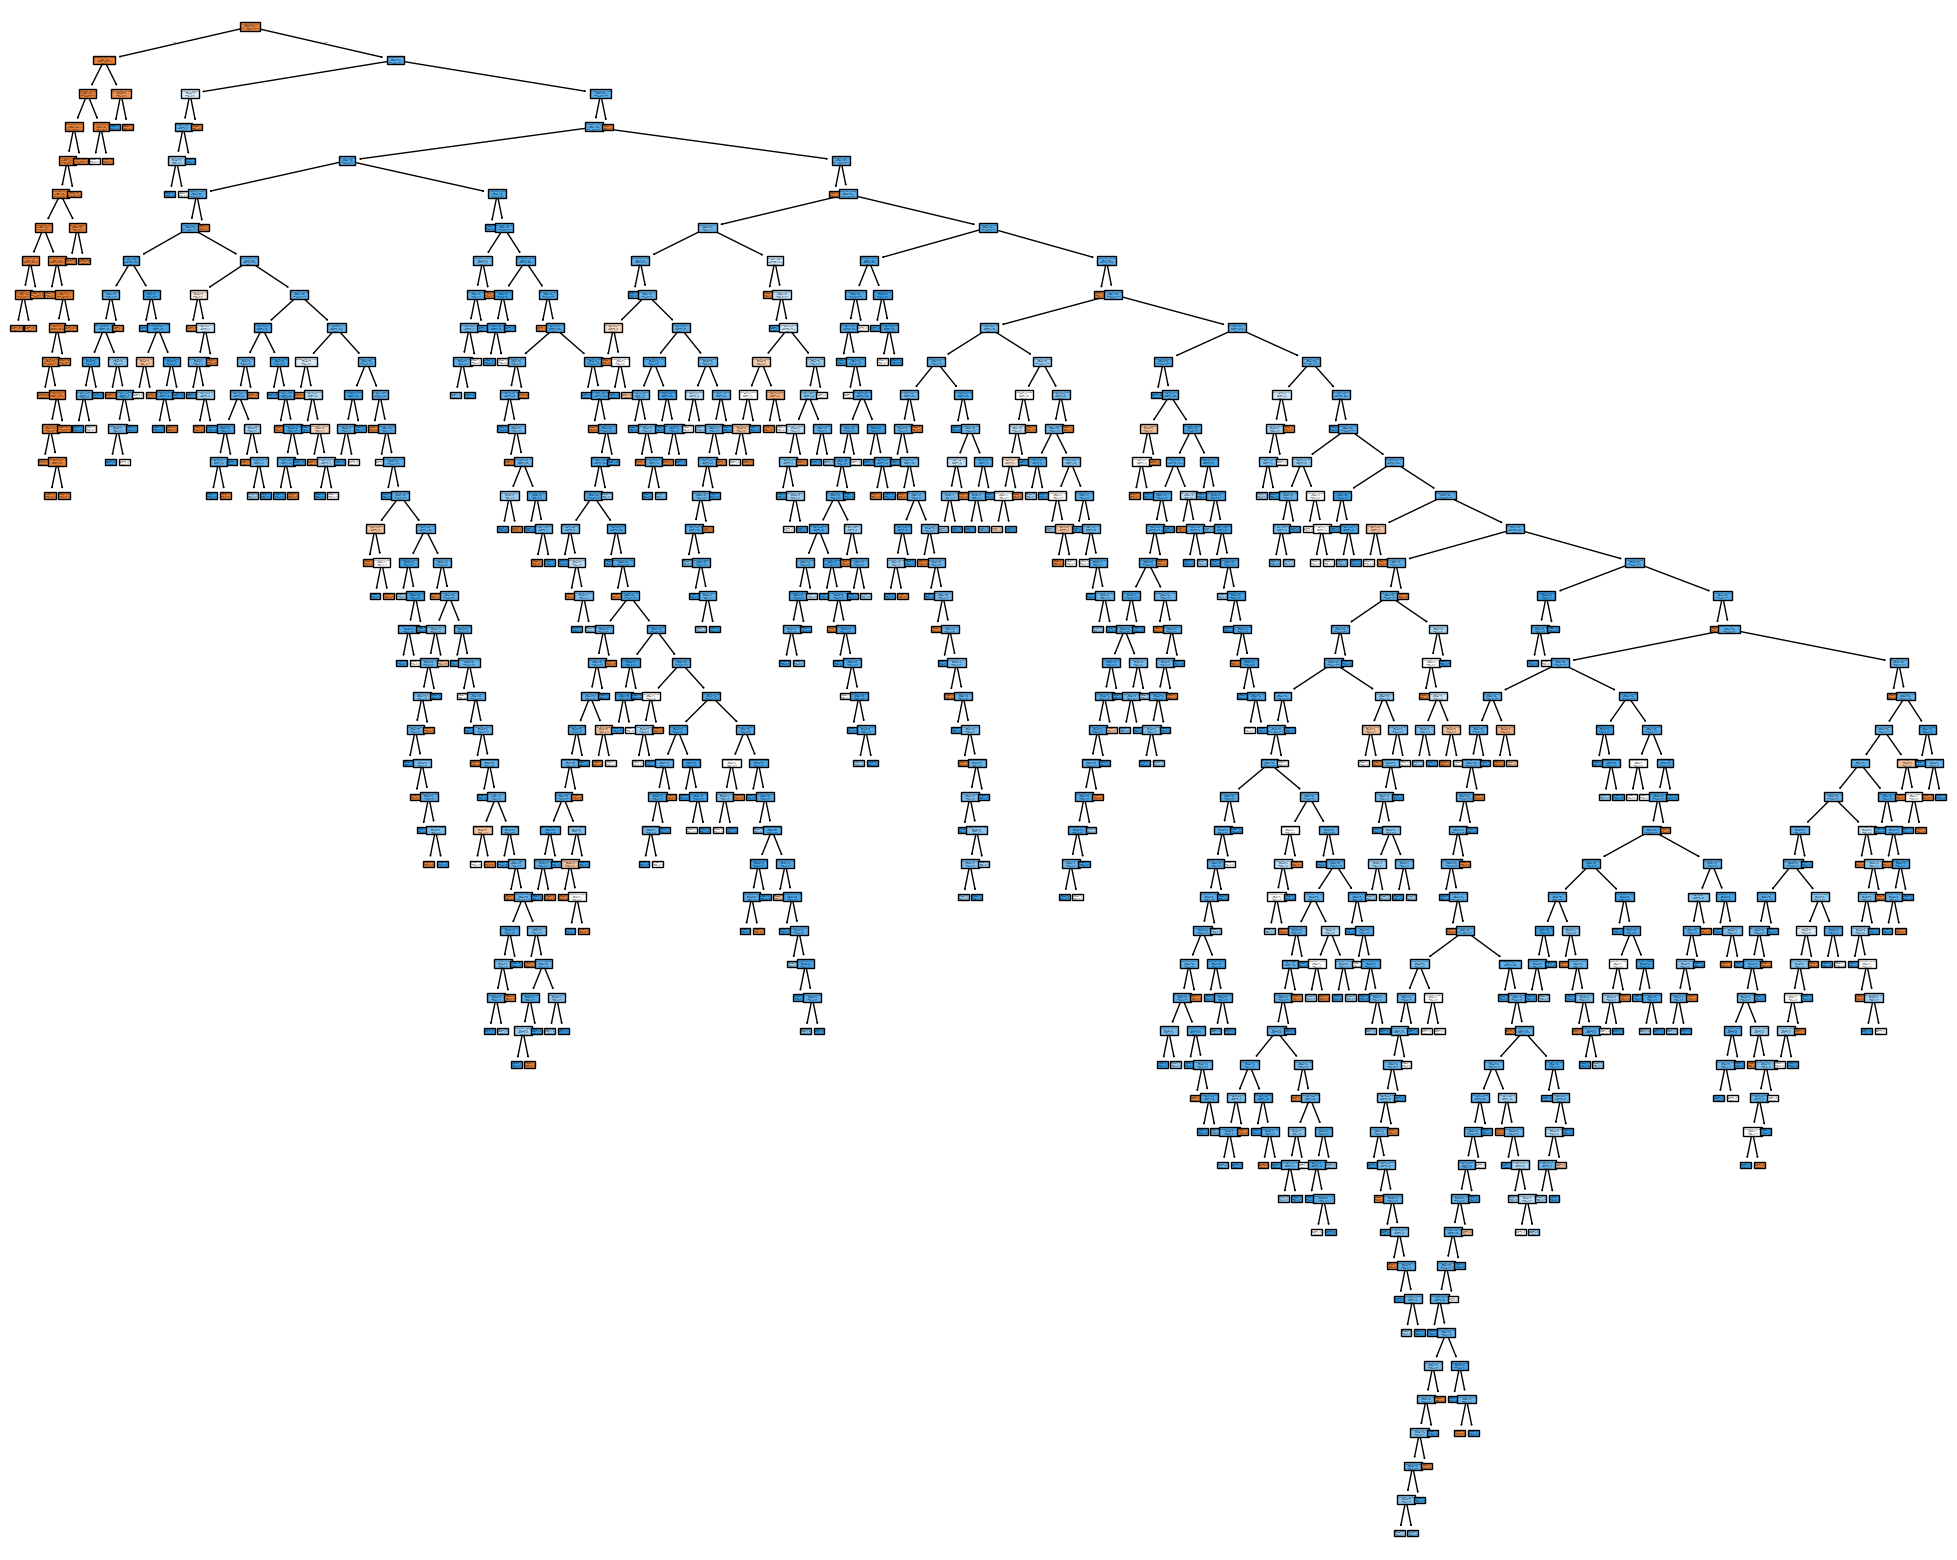

In [ ]:
from sklearn import tree

feature_names = df.columns.values.tolist()
feature_names.remove('loan_status')

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=feature_names,
                   class_names=['0', '1'],
                   filled=True)

In [ ]:
fig.savefig("decision_tree_1.png")

### Настройка гиперпараметров

Воспользуйтесь алгоритмом GridSearchCV для автоматического подбора гиперпараметров. Можете поэкспериментировать с диапазонами и критериями. После подбора лучших параметров вернитесь к пункту "Построение модели" и укажите новые параметры сборки. Сделайте предсказания, оцените модель и визуализируйте дерево решений.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Внимательно! </h1>
<b>В итоге у вас должно получиться две визуализации дерева решений. Не забудьте переименовать перед сохранением.</b>
</div>

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = {
'criterion': ['gini', 'entropy'],
'splitter' : ['best', 'random'],
'max_depth': [3,5,10,None],
'max_features': [1,3,5,7],
'min_samples_leaf': [1,2,3],
'min_samples_split': [1,2,3]
}

grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs =-1)

grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
960 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'random'}


In [ ]:
print(grid_search.best_score_)

0.9946003656578511


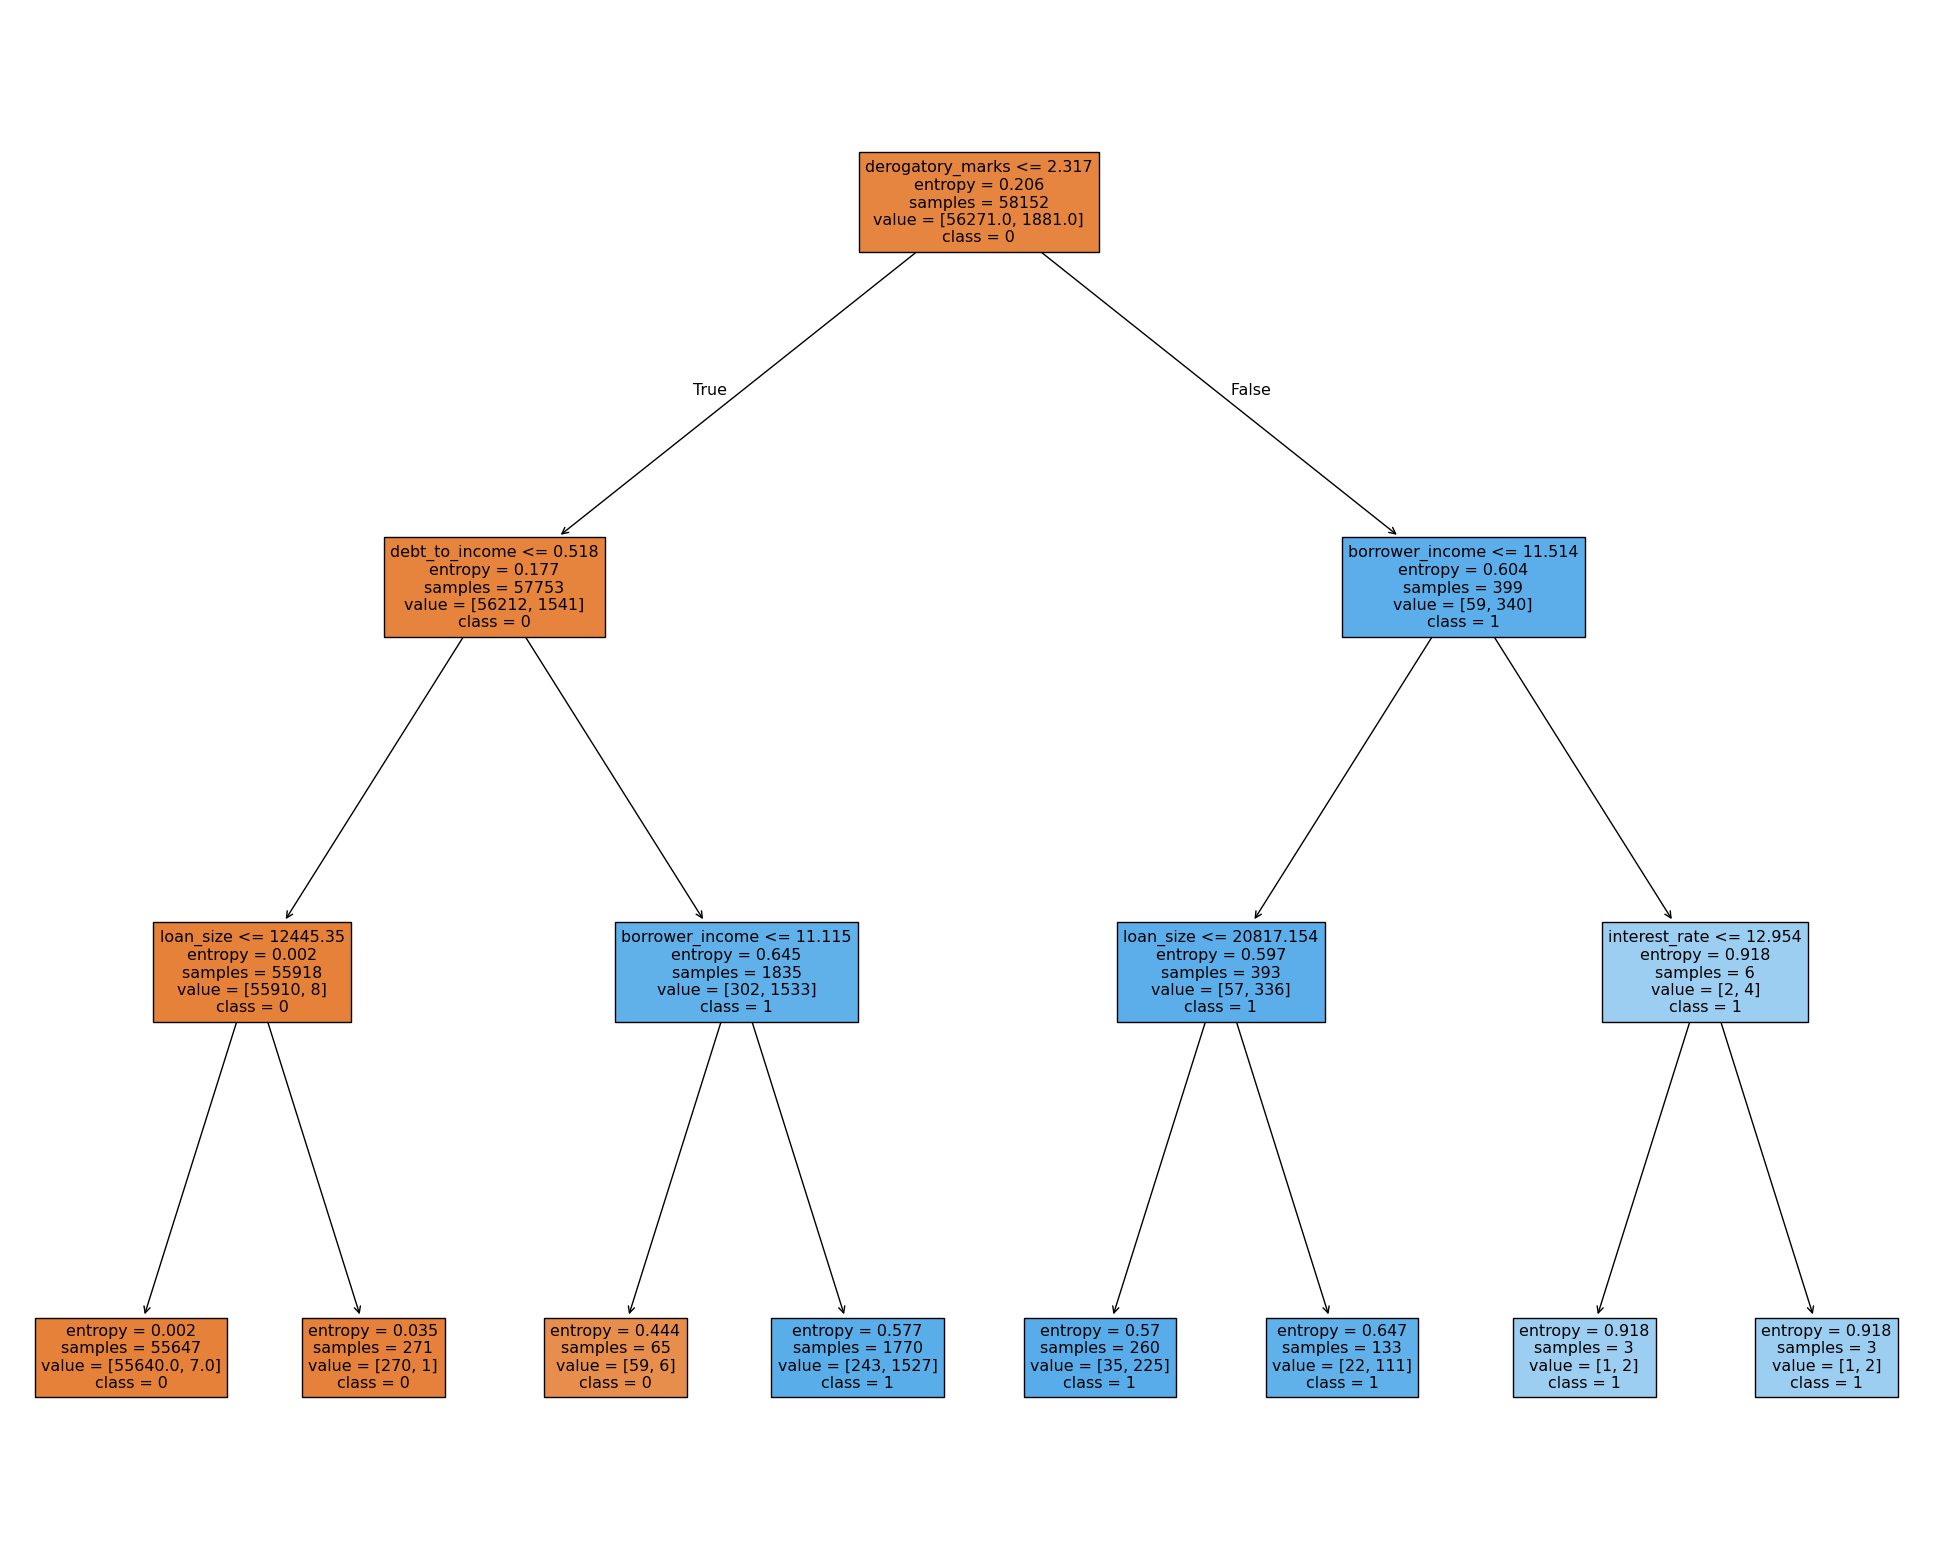

In [ ]:
best_model = grid_search.best_estimator_

feature_names = df.columns.values.tolist()
feature_names.remove('loan_status')

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model,
                   feature_names=feature_names,
                   class_names=['0', '1'],
                   filled=True)

fig.savefig("decision_tree_2.png")
